## 1) Load Images

Before we can begin, we need to load and convert our 28 x 28 pixel PNG images into a machine readable format.

In [4]:
# Import necessary packages
import os
import struct
import numpy as np
from PIL import Image
import torch

# Import helpers
import matplotlib.pyplot as plt

### Convert our Images and Create Labels

First, we need to convert our PNG images and create labels for them.

The MNIST dataset uses images in a idx3-ubyte format and labels in idx1-ubyte format; therefore it seems reasonable to follow suit and convert ours to match.

In [5]:
# Function to convert image to numpy array (grayscale or RGB)
def image_to_array(image_path):
    image = Image.open(image_path).convert('L')  # Convert to grayscale (L mode)
    return np.array(image)

#write to idx3 for images and idx1 for labels
def write_idx(images, labels, output_image_file, output_label_file):
    # Write the images in IDX3 format
    with open(output_image_file, 'wb') as f:
        f.write(struct.pack(">I", 2051))  # Magic number for images (2051)
        # Number of images, rows, cols
        f.write(struct.pack(">I", len(images)))  # Number of images
        f.write(struct.pack(">I", 28))  # Rows and columns (28X28 image)
        f.write(struct.pack(">I", 28))  
        for image in images:
            # Write each image as a flat byte array
            f.write(image.tobytes())
            
    # Write the labels in IDX3 format
    with open(output_label_file, 'wb') as f:
        # Magic number for labels
        f.write(struct.pack(">I", 2049))  # Magic number for labels (2049)
        # Number of labels
        f.write(struct.pack(">I", len(labels)))  # Number of labels
        for label in labels:
            # Write the label as a single byte
            f.write(struct.pack("B", label))

# Run our conversions for each image file
def convert(input_folder, output_image_file, output_label_file):
    images = []
    labels = []
    
    for filename in os.listdir(input_folder):
        if filename.endswith(".png"):
            # get label from Group5.Digits.<label char>_##.png
            label = filename[14]
            # opena nd convert to greyscale
            image = Image.open(os.path.join(input_folder, filename)).convert('L') 
            # Add image as array and add the label
            images.append(np.array(image))
            labels.append(int(label))
    # Convert to numpy array
    images = np.array(images)
    labels = np.array(labels)
    images = images.reshape(len(images), -1)  # Flatten images
    # Write our new files for later usage
    write_idx(images, labels, output_image_file, output_label_file)

# Usage
input_folder = "./image_files/digits/"
output_folder = "./train_data/"
output_image_file = os.path.join(output_folder, "Group5.Digits.Images.idx3-ubyte")
output_label_file = os.path.join(output_folder, "Group5.Digits.Labels.idx1-ubyte")
convert(input_folder, output_image_file, output_label_file)


### Visualize the Data

Just to show that everything works, we can now visualize the data from its IDX3 and IBX1 image and label formats.

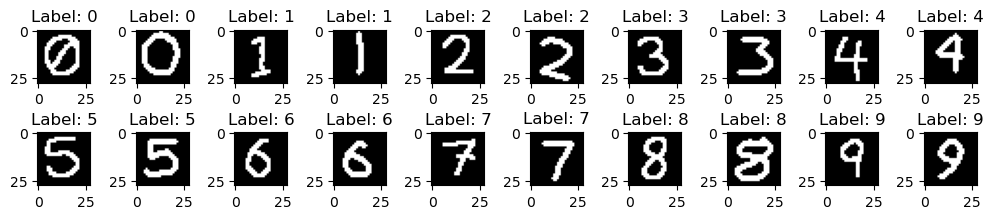

In [6]:
# Open the new idx3 file for images
def read_images(file_path):
    with open(file_path, 'rb') as f:
        magic, num_images, num_rows, num_cols = struct.unpack('>IIII', f.read(16))
        images = np.frombuffer(f.read(), dtype=np.uint8).reshape(num_images, num_rows * num_cols)
    return images

# Open the new idx1 file for labels
def read_labels(file_path):
    with open(file_path, 'rb') as f:
        magic, num_labels = struct.unpack('>II', f.read(8))
        labels = np.frombuffer(f.read(), dtype=np.uint8)
    return labels

# Call our functions and store our images and labels
images = read_images('./train_data/Group5.Digits.Images.idx3-ubyte')
labels = read_labels('./train_data/Group5.Digits.Labels.idx1-ubyte')

# Create variables for display
num_images = len(images)
num_cols = 10
num_rows = (num_images // num_cols) 
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, num_rows * 1.1))
axes = axes.flatten()  

# Print our plot of images and labels
for i in range(num_images):
    ax = axes[i]  
    image = images[i].reshape(28, 28)  
    ax.imshow(image, cmap='gray')  
    ax.set_title(f"Label: {labels[i]}")  

plt.tight_layout()
plt.show()
